In [18]:
%pylab inline
import networkx as nx
import scipy as sp
import torch as th
from matplotlib import colors

Populating the interactive namespace from numpy and matplotlib


In [152]:
edges=np.loadtxt("karate/edges.txt",dtype=np.int32)
nodes=np.loadtxt("karate/nodes.txt",dtype=np.int32)
nxg=nx.Graph()
for i in range(4):
    nxg.add_nodes_from(nodes[nodes[:,1]==i][:,0],labels=i)
nxg.add_edges_from(edges)


In [ ]:
values= np.array([node[1]['labels'] for node in nxg.nodes(data=True)])
layout=nx.spring_layout(nxg)
nx.draw_spring(nxg, cmap=plt.get_cmap('Set1'), node_color=values)

In [21]:

import dgl

In [22]:
g= dgl.DGLGraph()
g.from_networkx(nxg, node_attrs=['labels'])

In [23]:
num_nodes=g.number_of_nodes()
hidden_size = 6

In [24]:
g.ndata['labels']

tensor([1, 1, 2, 1, 0, 0, 0, 1, 3, 2, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 3,
        2, 2, 3, 2, 2, 3, 3, 2, 3, 3])

In [28]:
g.ndata['feat'] = th.ones(num_nodes, hidden_size)

In [32]:
train_mask = th.zeros((num_nodes))

In [34]:
train_mask[[0,2,4,8]] = 1

In [112]:
nxg = g.to_networkx(node_attrs=['labels']).to_undirected()

In [113]:
nxg

In [114]:
layout=nx.spring_layout(nxg)

In [115]:
masked_values

array([1., 5., 2., 5., 0., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

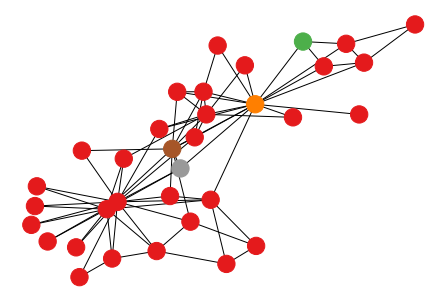

In [150]:
masked_values= -1*np.ones(num_nodes)
masked_values[[0,2,4,8]] = (g.ndata['labels'].numpy())[[0,2,4,8]]

nx.draw(nxg,pos=layout, cmap=plt.get_cmap('Set1', 5), node_color=masked_values, vmin=-1, vmax=3)

In [140]:
pp=plt.get_cmap('Paired', 5)

In [141]:
cmap = colors.ListedColormap(['#bdc7cc', '#9da9b2','#ccc2bd', '#5e656a', '#e9e9ec'])

In [143]:
cmap(-1)

(0.7411764705882353, 0.7803921568627451, 0.8, 1.0)

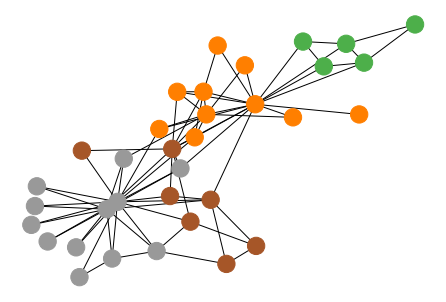

In [149]:
nx.draw(nxg,pos=layout, cmap=plt.get_cmap('Set1', 5), node_color=g.ndata['labels'].numpy(), vmin=-1, vmax=3)

In [37]:
masked_value = [values[i] if i in [0,2,4,8] else -1 for i in range(len(values))]

In [51]:
nxg.nodes[1]

{'labels': 1}

In [30]:
import torch.nn as nn

In [ ]:
class GraphConv(nn.Module):
    
    def __init__(self):
        self.linear = nn.Linear(hidden_size, )
    
    def forward(self, g, feat):
        g.update_all(f.copy_u('feat', 'm'), fn.sum('m', 'h'))
        
        return 
        

In [29]:
optimizer = th.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


NameError: name 'model' is not defined